<a href="https://colab.research.google.com/github/michaelwise12/hbc-wise/blob/main/HBC_Michael_Wise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Honors By Contract Jupyter Notebook
## Sentiment Analysis of Twitter Data
### Michael Wise
### Dr. Eitel Lauria

### Using the Twitter API to scrape tweets

In [1]:
from tweepy import *

In [2]:
pip install tweet-preprocessor

In [15]:
import pandas as pd
import csv
import re 
import string
import preprocessor as p
import numpy as np
 


#consumer_key = "0f4qm087pqjVnInJznVkTFFX8"
#consumer_secret = "eXZVF0o34KBubeaIAZoPq1nkxMqUQWfzgdmZHgvJa6zb2cSAa1"
#access_key= "1378220028-jHlhtOnuUOdWppwd3xQpb1AUmpo0WiSMWwejVPO"
#access_secret = "boVD8zrsiIjNPRBKFSOxShIO9VbU5QPWLfzlgS6FKE6QO"

### Authorize with OAuthhandler

In [5]:
#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_key, access_secret)

In [6]:
#api = API(auth,wait_on_rate_limit=True)

In [ ]:
#search_words = "[ukraine, russia, putin, nato, war]"      #enter your words
#new_search = search_words + " -filter:retweets"

In [ ]:
#for tweet in tweepy.Cursor(api.search,q=new_search,count=100,
 #                          lang="en",
  #                         since_id=0).items():
  #  csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'),tweet.user.screen_name.encode('utf-8'), tweet.user.location.encode('utf-8')])


In [ ]:
#csvFile = open('ukraine_tweets.csv', 'a')
#csvWriter = csv.writer(csvFile)

## Testing the accuracy of VADER compared to sentiment140

### Loading in sentiment140 (1.6 million prelabeled tweets)

In [8]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon.csv
User uploaded file "training.1600000.processed.noemoticon.csv" with length 238803811 bytes


In [13]:
colnames=['target', 'ids', 'date', 'flag', 'user', 'text']
sent140 = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', names=colnames)
sent140.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [25]:
sent140tweets = sent140[["text","target"]]
sent140tweets.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


Relabel the target (sentiment) column

* 0 ⇒ "negative"
* 4 ⇒ "positive"

In [27]:
sent140tweets.loc[sent140tweets.target == 0, 'target'] = "negative"
sent140tweets.loc[sent140tweets.target == 4, 'target'] = "positive"
sent140tweets

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,is upset that he can't update his Facebook by ...,negative
2,@Kenichan I dived many times for the ball. Man...,negative
3,my whole body feels itchy and like its on fire,negative
4,"@nationwideclass no, it's not behaving at all....",negative
...,...,...
1599995,Just woke up. Having no school is the best fee...,positive
1599996,TheWDB.com - Very cool to hear old Walt interv...,positive
1599997,Are you ready for your MoJo Makeover? Ask me f...,positive
1599998,Happy 38th Birthday to my boo of alll time!!! ...,positive


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [31]:
sentiments = SentimentIntensityAnalyzer()

VADER computes its own compound sentiment score for each of the tweets in the dataset (takes a little while)

In [32]:
sent140tweets["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in sent140tweets["text"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
sent140tweets.head(20)

,text,target,Compound,VADERPredSentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,-0.0173,negative
1,is upset that he can't update his Facebook by ...,negative,-0.7500,negative
2,@Kenichan I dived many times for the ball. Man...,negative,0.4939,positive
3,my whole body feels itchy and like its on fire,negative,-0.2500,negative
4,"@nationwideclass no, it's not behaving at all....",negative,-0.6597,negative
5,@Kwesidei not the whole crew,negative,0.0000,negative
6,Need a hug,negative,0.4767,positive
7,@LOLTrish hey long time no see! Yes.. Rains a...,negative,0.7450,positive
8,@Tatiana_K nope they didn't have it,negative,0.0000,negative
9,@twittera que me muera ?,negative,0.0000,negative


Threshold (we will eventually remove the neutral class):
* positive sentiment: compound score >= 0.5
* negative sentiment: compound score <= -0.5

In [85]:
def calcsent140(score):
  if score >= 0.5:
    return 'positive'
  elif score <= -0.5:
      return 'negative'
  else:
      return 'neutral'

In [86]:
sent140tweets['VADERPredSentiment'] = sent140tweets.apply(lambda c: calcsent140(c['Compound']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
sent140tweets.head(10)

,text,target,Compound,VADERPredSentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,-0.0173,neutral
1,is upset that he can't update his Facebook by ...,negative,-0.7500,negative
2,@Kenichan I dived many times for the ball. Man...,negative,0.4939,neutral
3,my whole body feels itchy and like its on fire,negative,-0.2500,neutral
4,"@nationwideclass no, it's not behaving at all....",negative,-0.6597,negative
5,@Kwesidei not the whole crew,negative,0.0000,neutral
6,Need a hug,negative,0.4767,neutral
7,@LOLTrish hey long time no see! Yes.. Rains a...,negative,0.7450,positive
8,@Tatiana_K nope they didn't have it,negative,0.0000,neutral
9,@twittera que me muera ?,negative,0.0000,neutral


In [88]:
sent140tweets.shape

(1600000, 4)

### Remove any tweets where the sentiment isn't detected to be polar enough  - ie neutral (too in the middle according to VADER)

In [89]:
sent140tweetsPN = sent140tweets[sent140tweets['VADERPredSentiment'] != "neutral"]

In [90]:
sent140tweetsPN

,text,target,Compound,VADERPredSentiment
1,is upset that he can't update his Facebook by ...,negative,-0.7500,negative
4,"@nationwideclass no, it's not behaving at all....",negative,-0.6597,negative
7,@LOLTrish hey long time no see! Yes.. Rains a...,negative,0.7450,positive
12,@caregiving I couldn't bear to watch it. And ...,negative,-0.5994,negative
16,Hollis' death scene will hurt me severely to w...,negative,-0.9081,negative
...,...,...,...,...
1599991,@rmedina @LaTati Mmmm That sounds absolutely ...,positive,-0.6467,negative
1599994,"@Cliff_Forster Yeah, that does work better tha...",positive,0.7906,positive
1599995,Just woke up. Having no school is the best fee...,positive,0.5423,positive
1599998,Happy 38th Birthday to my boo of alll time!!! ...,positive,0.6784,positive


In [91]:
sent140tweetsPN.shape

(596145, 4)

In [92]:
sent140pred = sent140tweetsPN["target"]
VADERpred = sent140tweetsPN["VADERPredSentiment"]

In [93]:
from sklearn import metrics

results = metrics.accuracy_score(sent140pred, VADERpred)

In [94]:
results

0.7742646503786831

77% isn't bad at all, considering how many records we have and that some of the labels on the sentiment140 are questionable themselves. Yet this is promising enough that we can use VADER for the time being.

In fact, just through skimming through some of the dataset and actually reading the tweets verbatim, I think VADER was better at determining a score then the original data set did. This also count account for change in accuracy - perhaps I could find another data set - but this one was the best I could find for right now.

In [95]:
from sklearn.metrics import confusion_matrix
# confusion matrix
matrix = confusion_matrix(sent140pred,VADERpred)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[142347 109216]
 [ 25355 319227]]


Confusion matrix tells us a little clearer of a picture.

# Sentiment Analysis

## Reading the raw data

In [7]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ukraine_tweets.csv to ukraine_tweets.csv
User uploaded file "ukraine_tweets.csv" with length 11847102 bytes


We will use the vader lexicon to classify our Tweets.

In [96]:
ukraine_data = pd.read_csv("ukraine_tweets.csv")
ukraine_data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.514120e+18,1.514120e+18,2022-04-13 05:42:14 UTC,4/13/2022,5:42:14,0,1.688715e+08,kohteix,kohtei,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.514120e+18,1.514000e+18,2022-04-13 05:42:13 UTC,4/13/2022,5:42:13,0,1.496720e+18,marcosmilep,Marco,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'KyivIndependent', 'name': 'T...",NaN,NaN,NaN,NaN
2,1.514120e+18,1.514110e+18,2022-04-13 05:42:12 UTC,4/13/2022,5:42:12,0,1.459560e+18,unnoble_savage,Incomplete Arguments 🇺🇦,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'KyivIndependent', 'name': 'T...",NaN,NaN,NaN,NaN
3,1.514120e+18,1.514080e+18,2022-04-13 05:42:12 UTC,4/13/2022,5:42:12,0,1.500420e+18,meangenel,meangeneLbrother,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'sam26407516', 'name': 'sam',...",NaN,NaN,NaN,NaN
4,1.514120e+18,1.513520e+18,2022-04-13 05:42:11 UTC,4/13/2022,5:42:11,0,8.438083e+07,kamiloalvarez,Kam,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BIGTCsoupywolf', 'name': 'im...",NaN,NaN,NaN,NaN


In [97]:
ukraine_data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [98]:
ukraine_tweets = ukraine_data[["username", "tweet", "language"]]

In [99]:
ukraine_tweets.head(10)

,username,tweet,language
0,kohteix,📚マメ知識👩 極東ロシアの💵出稼ぎ先💶の主流が韓国に👧👩ロシアから愛をこめて💋Россия💄...,ja
1,marcosmilep,@KyivIndependent @irimiandra 💢This is the diff...,en
2,unnoble_savage,@KyivIndependent I'm pretty sure no one countr...,en
3,meangenel,@sam26407516 @Dull_guy25 @MapsUkraine That's w...,en
4,kamiloalvarez,@BIGTCsoupywolf @nicolas65728620 @ScoottyU @Th...,en
5,8pisaac_sonishi,#UkraineRussiaWar はやはり #us vs.#Russia の代理戦争！,ja
6,iamtiye,@POTUS You mean Biden's intereference sanction...,en
7,sebastienk,The EU wants to take choice away from consumer...,en
8,_carymile_,@iiumirose @docowboyslikeme It's not one perso...,en
9,ulibeudgen,Story: @AFP: 'City in ruins. @AFP's Alexander...,en


In [100]:
ukraine_tweets.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [101]:
ukraine_tweets["language"].value_counts()

en     17307
it       757
und      535
pt       241
ru       227
in       156
ja       132
hi       109
es        67
de        65
ur        45
fr        33
ca        32
fi        31
th        25
nl        25
zh        24
pl        23
tl        20
ro        18
cs        16
et        15
uk        14
el        14
ta        10
tr         8
sl         6
sv         6
te         6
ar         6
ml         5
no         5
gu         4
da         4
ht         3
kn         3
ne         3
lt         2
cy         2
pa         2
lv         2
mr         2
vi         1
ko         1
bn         1
or         1
fa         1
bg         1
hu         1
ps         1
sr         1
Name: language, dtype: int64

For now, let's stick with tweets that are in English.

In [102]:
ukraine_tweets = ukraine_tweets[ukraine_tweets["language"] == "en"]

In [103]:
ukraine_tweets

,username,tweet,language
1,marcosmilep,@KyivIndependent @irimiandra 💢This is the diff...,en
2,unnoble_savage,@KyivIndependent I'm pretty sure no one countr...,en
3,meangenel,@sam26407516 @Dull_guy25 @MapsUkraine That's w...,en
4,kamiloalvarez,@BIGTCsoupywolf @nicolas65728620 @ScoottyU @Th...,en
6,iamtiye,@POTUS You mean Biden's intereference sanction...,en
...,...,...,...
20012,wealthopinion,China and Russia continue to develop and deplo...,en
20014,sjmagill73,@Natalii35994996 @laurenboebert Russia deems t...,en
20015,boltalogger,"In one of the regions of Russia, local residen...",en
20017,mr_arrowhead,Ion why I think Sweden/Russia when I watch Mid...,en


# Preprocessing
## Cleaning the tweets by removing stop words, typos, emojis and punctuation with the `NTLK` package
### Future investigation: leave certain punctuation in string

In [104]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Snowball Stemmer - reducing a word to its base word or stem in such a way that the words of similar kind lie under a common stem.

**Examples:**


*   cared  ⇒  care
* university  ⇒ univers
* fairly ⇒ fair
* easily ⇒ easili
* singing ⇒ sing
* sings ⇒ sing
* sung ⇒ sung
* singer ⇒ singer
* sportingly⇒ sport

Pros: word list becomes smaller, makes predictions more accurate

Cons: new formed sentences are less legible to humans

In [105]:
def clean(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    text = str(text).lower() #change to lowercase
    text = re.sub('\[.*?\]', '', text)       #punctuation
    text = re.sub('@[^\s]+','',text) # usernames
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
ukraine_tweets["tweet"] = ukraine_tweets["tweet"].apply(clean)

In [106]:
ukraine_tweets.head(10)

,username,tweet,language
1,marcosmilep,differ ukrain give highprofil prison ukrain...,en
2,unnoble_savage,im pretti sure one countri hate russia much p...,en
3,meangenel,that russia lost troop tank year afghanist...,en
4,kamiloalvarez,compar ussr tech russia tech xd go read m...,en
6,iamtiye,mean biden interefer sanction russia driven g...,en
7,sebastienk,eu want take choic away consum eu say million ...,en
8,_carymile_,one person russia major russian support war ...,en
9,ulibeudgen,stori citi ruin alexand nemenov photograph ...,en
10,jasminepittend1,ukrainerussia war live updat unit state say pr...,en
11,kyivindependent,⚡️ un civilian casualti ukrain result russia ...,en


### `VADER` does classification in three categories: *positive*, *negative*, and *neutral*

In [107]:
sentiments = SentimentIntensityAnalyzer()

In [108]:
ukraine_tweets["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in ukraine_tweets["tweet"]]
ukraine_tweets["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in ukraine_tweets["tweet"]]
ukraine_tweets["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in ukraine_tweets["tweet"]]
ukraine_tweets["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in ukraine_tweets["tweet"]]
ukraine_tweets = ukraine_tweets[["tweet", "Positive", "Negative", "Neutral", "Compound"]]

In [109]:
ukraine_tweets.head(10)

,tweet,Positive,Negative,Neutral,Compound
1,differ ukrain give highprofil prison ukrain...,0.000,0.148,0.852,-0.5106
2,im pretti sure one countri hate russia much p...,0.153,0.247,0.600,-0.3400
3,that russia lost troop tank year afghanist...,0.000,0.360,0.640,-0.7351
4,compar ussr tech russia tech xd go read m...,0.347,0.071,0.582,0.8860
6,mean biden interefer sanction russia driven g...,0.000,0.259,0.741,-0.5423
7,eu want take choic away consum eu say million ...,0.159,0.000,0.841,0.4767
8,one person russia major russian support war ...,0.164,0.426,0.410,-0.8519
9,stori citi ruin alexand nemenov photograph ...,0.000,0.167,0.833,-0.5859
10,ukrainerussia war live updat unit state say pr...,0.000,0.302,0.698,-0.5994
11,⚡️ un civilian casualti ukrain result russia ...,0.000,0.428,0.572,-0.9595


#### Sentiment compound score in standard literature:

* positive sentiment: compound score >= 0.05
* neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
* negative sentiment: compound score <= -0.05

In [110]:
def calcsentiment(score):
  if score >= 0.05:
      return 'positive'
  elif score <= -0.05:
      return 'negative'
  else:
      return 'neutral'

In [111]:
ukraine_tweets['Sentiment'] = ukraine_tweets.apply(lambda c: calcsentiment(c['Compound']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
ukraine_tweets.head(10)

,tweet,Positive,Negative,Neutral,Compound,Sentiment
1,differ ukrain give highprofil prison ukrain...,0.000,0.148,0.852,-0.5106,negative
2,im pretti sure one countri hate russia much p...,0.153,0.247,0.600,-0.3400,negative
3,that russia lost troop tank year afghanist...,0.000,0.360,0.640,-0.7351,negative
4,compar ussr tech russia tech xd go read m...,0.347,0.071,0.582,0.8860,positive
6,mean biden interefer sanction russia driven g...,0.000,0.259,0.741,-0.5423,negative
7,eu want take choic away consum eu say million ...,0.159,0.000,0.841,0.4767,positive
8,one person russia major russian support war ...,0.164,0.426,0.410,-0.8519,negative
9,stori citi ruin alexand nemenov photograph ...,0.000,0.167,0.833,-0.5859,negative
10,ukrainerussia war live updat unit state say pr...,0.000,0.302,0.698,-0.5994,negative
11,⚡️ un civilian casualti ukrain result russia ...,0.000,0.428,0.572,-0.9595,negative


In [113]:
ukraine_tweets["Sentiment"].value_counts()

negative    8695
positive    4767
neutral     3845
Name: Sentiment, dtype: int64

Looks like we have a good mix of tweets that were labeled negative, neutral, and positive.

## The next step - Classification

### BOW + Naive Bayes

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [115]:
count_vect = CountVectorizer() # run it plain vanilla

print(count_vect)

CountVectorizer()


Similar to what we did when comparing VADER to the sentiment140 dataset, we are going to drop all of the "neutral" values, turning this into a binary classification problem.

In [116]:
ukraine_tweetsPN = ukraine_tweets[ukraine_tweets['Sentiment'] != "neutral"]

In [122]:
ukraine_tweetsPN

,tweet,Positive,Negative,Neutral,Compound,Sentiment
1,differ ukrain give highprofil prison ukrain...,0.000,0.148,0.852,-0.5106,negative
2,im pretti sure one countri hate russia much p...,0.153,0.247,0.600,-0.3400,negative
3,that russia lost troop tank year afghanist...,0.000,0.360,0.640,-0.7351,negative
4,compar ussr tech russia tech xd go read m...,0.347,0.071,0.582,0.8860,positive
6,mean biden interefer sanction russia driven g...,0.000,0.259,0.741,-0.5423,negative
...,...,...,...,...,...,...
20005,idiot offic danger especi abandon belarus...,0.000,0.658,0.342,-0.8625,negative
20007,dear yukrain open ur eye keep push weapon amm...,0.084,0.071,0.844,0.1027,positive
20011,fear outlook global econom growth among larg i...,0.097,0.266,0.637,-0.6705,negative
20012,china russia continu develop deploy weapon att...,0.000,0.261,0.739,-0.6486,negative


In [123]:
x = ukraine_tweetsPN["tweet"]
y = ukraine_tweetsPN["Sentiment"]

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [125]:
x_train = count_vect.fit_transform(x_train).toarray()
x_test = count_vect.transform(x_test).toarray()

In [126]:
print(x_train.shape)
x_train

(10096, 13168)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [127]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [128]:
predictions = model.predict(x_test)
predictions

array(['negative', 'negative', 'negative', ..., 'negative', 'positive',
       'negative'], dtype='<U8')

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score 
from sklearn.metrics import confusion_matrix,roc_curve, auc

In [144]:
# Report the predictive performance metrics
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
precision=precision_score(y_test, predictions, pos_label="negative")
recall=recall_score(y_test, predictions,  pos_label="negative")
specificity=recall_score(y_test, predictions, pos_label="negative")

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision *100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........:{(1-specificity) * 100:.4f}")



Accuracy.........: 80.4516
Precision........: 80.9894
Recall...........: 91.1224
FP Rate...........:8.8776


Confusion matrix.:
 [[1981  193]
 [ 465  727]]


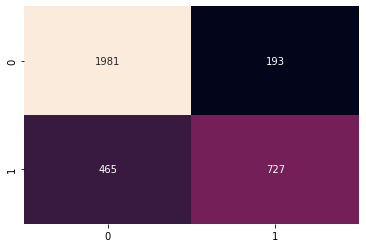

In [143]:
cm = confusion_matrix(y_test, predictions)
print(f"Confusion matrix.:\n {cm}")

#This is nicer
sns.heatmap(cm, annot=True,fmt='d',cbar=False);

Wow! 80% accuracy with bag of words + naive bayes! I'm sure we can do a lot better too.